# Time Series Project: Earth Surface Temperature Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from formating import dtf, string_format_time_guide as sft
from formating import flat, bold, underline, strike

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt


In [94]:
from wrangle import summarize
from viz import boxplots, hists

<div class= "alert-box alert alert-info">
    </div>

***
# Executive Summary

**We set out to find the temperatures in Texas and Colorado over time<br>to see where we want to live in 5 years from now:<br>- Project Where to Live in 2027**

1. For this project we used kaggle's Global Land Temperature By State dataset<br>which can be found here: [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download&select=GlobalLandTemperaturesByState.csv)



<div class= "alert-box alert alert-info">
    </div>

***
# Wrangle

<!-- <div class= "alert-box alert alert-info">
    </div> -->

***
## Acquire

In [111]:
# df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [114]:
# df[df.City == 'San Antonio']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [117]:
# df[df.Country == 'United States'].City.value_counts()

Chicago        3239
New York       3239
Los Angeles    1977
Name: City, dtype: int64

In [30]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [31]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


<div class= "alert-box alert alert-info">
    </div>

***
## Prepare

In [32]:
df.columns = df.columns.str.lower()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   averagetemperature             620027 non-null  float64
 2   averagetemperatureuncertainty  620027 non-null  float64
 3   state                          645675 non-null  object 
 4   country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [34]:
df.dt[0]

'1855-05-01'

In [35]:
# df.dt.str.replace(' 00:00:00', '')

In [40]:
# df.dt = pd.to_datetime(df.dt)
df['date'] = df['dt']
df.drop(columns='dt', inplace=True)

In [49]:
df.date = pd.to_datetime(df.date)

In [60]:
df['date']

0        1855-05-01
1        1855-06-01
2        1855-07-01
3        1855-08-01
4        1855-09-01
            ...    
645670   2013-05-01
645671   2013-06-01
645672   2013-07-01
645673   2013-08-01
645674   2013-09-01
Name: date, Length: 645675, dtype: datetime64[ns]

In [68]:
df.date

0        1855-05-01
1        1855-06-01
2        1855-07-01
3        1855-08-01
4        1855-09-01
            ...    
645670   2013-05-01
645671   2013-06-01
645672   2013-07-01
645673   2013-08-01
645674   2013-09-01
Name: date, Length: 645675, dtype: datetime64[ns]

In [69]:
df[df.state == 'Texas']

,averagetemperature,averagetemperatureuncertainty,state,country,date
549727,4.489,3.369,Texas,United States,1820-01-01
549728,9.081,2.873,Texas,United States,1820-02-01
549729,12.657,2.423,Texas,United States,1820-03-01
549730,19.215,2.501,Texas,United States,1820-04-01
549731,22.577,2.495,Texas,United States,1820-05-01
...,...,...,...,...,...
552047,22.628,0.158,Texas,United States,2013-05-01
552048,27.841,0.220,Texas,United States,2013-06-01
552049,27.630,0.182,Texas,United States,2013-07-01
552050,28.663,0.247,Texas,United States,2013-08-01


In [70]:
df[df.state == 'Colorado']

,averagetemperature,averagetemperatureuncertainty,state,country,date
96604,-8.713,2.817,Colorado,United States,1820-01-01
96605,-3.681,2.824,Colorado,United States,1820-02-01
96606,-0.536,2.618,Colorado,United States,1820-03-01
96607,6.927,2.633,Colorado,United States,1820-04-01
96608,11.167,2.537,Colorado,United States,1820-05-01
...,...,...,...,...,...
98924,11.694,0.149,Colorado,United States,2013-05-01
98925,18.824,0.257,Colorado,United States,2013-06-01
98926,20.476,0.198,Colorado,United States,2013-07-01
98927,19.499,0.265,Colorado,United States,2013-08-01


In [71]:
df[df.state == 'Colorado'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 96604 to 98928
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   averagetemperature             2324 non-null   float64       
 1   averagetemperatureuncertainty  2324 non-null   float64       
 2   state                          2325 non-null   object        
 3   country                        2325 non-null   object        
 4   date                           2325 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 109.0+ KB


In [72]:
tx = df[df.state == 'Texas']

co = df[df.state == 'Colorado']

- **Let's check our Nulls**

In [73]:
tx.isnull().value_counts()

averagetemperature  averagetemperatureuncertainty  state  country  date 
False               False                          False  False    False    2325
dtype: int64

- **Sweet! No Nulls. I LOVE currated datasets!!**

- **We'll get this TimeSeries split and start looking at Exploration**

In [75]:
tx.date.describe(datetime_is_numeric=True)

count                             2325
mean     1916-10-31 11:13:14.322580736
min                1820-01-01 00:00:00
25%                1868-06-01 00:00:00
50%                1916-11-01 00:00:00
75%                1965-04-01 00:00:00
max                2013-09-01 00:00:00
Name: date, dtype: object

In [76]:
tx.reset_index(drop=True, inplace=True)
tx

,averagetemperature,averagetemperatureuncertainty,state,country,date
0,4.489,3.369,Texas,United States,1820-01-01
1,9.081,2.873,Texas,United States,1820-02-01
2,12.657,2.423,Texas,United States,1820-03-01
3,19.215,2.501,Texas,United States,1820-04-01
4,22.577,2.495,Texas,United States,1820-05-01
...,...,...,...,...,...
2320,22.628,0.158,Texas,United States,2013-05-01
2321,27.841,0.220,Texas,United States,2013-06-01
2322,27.630,0.182,Texas,United States,2013-07-01
2323,28.663,0.247,Texas,United States,2013-08-01


In [77]:
co.reset_index(drop=True, inplace=True)
co

,averagetemperature,averagetemperatureuncertainty,state,country,date
0,-8.713,2.817,Colorado,United States,1820-01-01
1,-3.681,2.824,Colorado,United States,1820-02-01
2,-0.536,2.618,Colorado,United States,1820-03-01
3,6.927,2.633,Colorado,United States,1820-04-01
4,11.167,2.537,Colorado,United States,1820-05-01
...,...,...,...,...,...
2320,11.694,0.149,Colorado,United States,2013-05-01
2321,18.824,0.257,Colorado,United States,2013-06-01
2322,20.476,0.198,Colorado,United States,2013-07-01
2323,19.499,0.265,Colorado,United States,2013-08-01


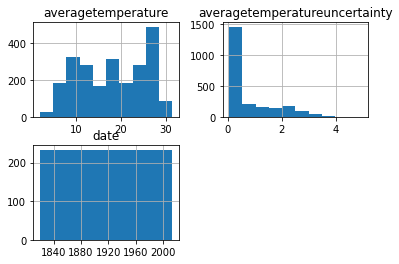

In [78]:
tx.hist()
plt.show()

- **Looks like the majority of the data has very small uncertainty,**
- **the dates seem to be uniform**
- **and the average temperature gets over 400° sometimes...??? That's not what that means.**

In [80]:
tx.date[0]

Timestamp('1820-01-01 00:00:00')

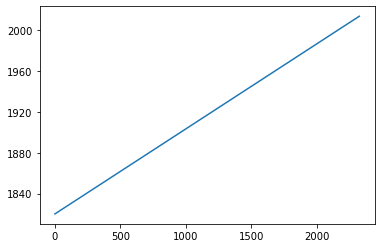

In [82]:
tx.date.plot()
plt.show()

In [85]:
tx = tx.set_index('date')

In [86]:
tx

,averagetemperature,averagetemperatureuncertainty,state,country
date,,,,
1820-01-01,4.489,3.369,Texas,United States
1820-02-01,9.081,2.873,Texas,United States
1820-03-01,12.657,2.423,Texas,United States
1820-04-01,19.215,2.501,Texas,United States
1820-05-01,22.577,2.495,Texas,United States
...,...,...,...,...
2013-05-01,22.628,0.158,Texas,United States
2013-06-01,27.841,0.220,Texas,United States
2013-07-01,27.630,0.182,Texas,United States


In [87]:
co = co.set_index('date')

In [88]:
co

,averagetemperature,averagetemperatureuncertainty,state,country
date,,,,
1820-01-01,-8.713,2.817,Colorado,United States
1820-02-01,-3.681,2.824,Colorado,United States
1820-03-01,-0.536,2.618,Colorado,United States
1820-04-01,6.927,2.633,Colorado,United States
1820-05-01,11.167,2.537,Colorado,United States
...,...,...,...,...
2013-05-01,11.694,0.149,Colorado,United States
2013-06-01,18.824,0.257,Colorado,United States
2013-07-01,20.476,0.198,Colorado,United States


In [89]:
tx.columns

Index(['averagetemperature', 'averagetemperatureuncertainty', 'state',
       'country'],
      dtype='object')

In [90]:
tx.columns = ['temp', 'avg_uncertainty', 'state',
       'country']

In [91]:
co.columns = ['temp', 'avg_uncertainty', 'state',
       'country']

In [92]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             2325 non-null   float64
 1   avg_uncertainty  2325 non-null   float64
 2   state            2325 non-null   object 
 3   country          2325 non-null   object 
dtypes: float64(2), object(2)
memory usage: 90.8+ KB


In [93]:
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             2324 non-null   float64
 1   avg_uncertainty  2324 non-null   float64
 2   state            2325 non-null   object 
 3   country          2325 non-null   object 
dtypes: float64(2), object(2)
memory usage: 90.8+ KB


In [96]:
sft()

</style>
<h1 id="strftime-format-specifiers"><code>strftime</code> Format Specifiers</h1>
<table>
<thead>
<tr class="header">
<th>Units</th>
<th>Specifier</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>seconds</strong></td>
<td><code>%S</code></td>
<td>Second of the minute (00..60)</td>
</tr>
<tr class="even">
<td><strong>minutes</strong></td>
<td><code>%M</code></td>
<td>Minute of the hour (00..59)</td>
</tr>
<tr class="odd">
<td><strong>hours</strong></td>
<td><code>%H</code></td>
<td>Hour of the day, 24-hour clock (00..23)</td>
</tr>
<tr class="even">
<td></td>
<td><code>%I</code></td>
<td>Hour of the day, 12-hour clock (01..12)</td>
</tr>
<tr class="odd">
<td><strong>days</strong></td>
<td><code>%d</code></td>
<td>Day of the month</td>
</tr>
<tr class="even">
<td></td>
<td><code>%a</code></td>
<td>The abbreviated weekday name (“Sun”)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%A</code></td>
<td>The full weekday name (“Sunday”)</td>
</tr>
<tr class="even">
<td></td>
<td><code>%j</code></td>
<td>Day of the year (001..366)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%w</code></td>
<td>Day of the week, Sunday is 0 (0..6)</td>
</tr>
<tr class="even">
<td><strong>weeks</strong></td>
<td><code>%U</code></td>
<td>Week of the year, Sunday is the first day of the week (00..53)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%W</code></td>
<td>Week of the year, Monday is the first day of the week (00..53)</td>
</tr>
<tr class="even">
<td><strong>months</strong></td>
<td><code>%b</code></td>
<td>The abbreviated month name (“Jan”)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%B</code></td>
<td>The full month name (“January”)</td>
</tr>
<tr class="even">
<td></td>
<td><code>%d</code></td>
<td>Day of the month (01..31)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%m</code></td>
<td>Month of the year (01..12)</td>
</tr>
<tr class="even">
<td><strong>years</strong></td>
<td><code>%y</code></td>
<td>Year without a century (00..99)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%Y</code></td>
<td>Year with century (1999)</td>
</tr>
<tr class="even">
<td><strong>misc</strong></td>
<td><code>%z</code></td>
<td>Time zone offset (-0500)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%Z</code></td>
<td>Time zone name (“CDT”)</td>
</tr>
<tr class="even">
<td></td>
<td><code>%p</code></td>
<td>Meridian indicator (“AM” or “PM”)</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%c</code></td>
<td>The preferred local date and time representation</td>
</tr>
<tr class="even">
<td></td>
<td><code>%x</code></td>
<td>Preferred representation for the date alone, no time</td>
</tr>
<tr class="odd">
<td></td>
<td><code>%X</code></td>
<td>Preferred representation for the time alone, no date</td>
</tr>
</tbody>
</table>
</body>
</html>

In [98]:
tx.index = tx.index.strftime('%Y-%m-%d')

In [100]:
tx.index[0]

'1820-01-01'

In [101]:
co.index = co.index.strftime('%Y-%m-%d')

In [102]:
co.describe()

,temp,avg_uncertainty
count,2324.000000,2324.000000
mean,6.931334,0.842171
std,8.825568,0.925108
min,-10.962000,0.058000
25%,-1.140750,0.203000
50%,6.758500,0.333000
75%,15.439000,1.241500
max,22.484000,4.854000


In [104]:
tx.describe()

,temp,avg_uncertainty
count,2325.000000,2325.000000
mean,18.107234,0.794785
std,7.413791,0.893291
min,1.965000,0.044000
25%,11.206000,0.180000
50%,18.378000,0.310000
75%,25.398000,1.241000
max,31.401000,4.950000


In [106]:
(tx.temp * 1.8 + 32).describe()

count    2325.000000
mean       64.593021
std        13.344825
min        35.537000
25%        52.170800
50%        65.080400
75%        77.716400
max        88.521800
Name: temp, dtype: float64

In [107]:
(co.temp * 1.8 + 32).describe()

count    2324.000000
mean       44.476401
std        15.886022
min        12.268400
25%        29.946650
50%        44.165300
75%        59.790200
max        72.471200
Name: temp, dtype: float64

In [108]:
tx[tx.temp == tx.temp.max()]

,temp,avg_uncertainty,state,country
date,,,,
2011-08-01,31.401,0.182,Texas,United States


In [109]:
(31.401 + .182) * 1.8 + 32

88.8494

In [119]:
tx.index[0], tx.index[-1]

('1820-01-01', '2013-09-01')

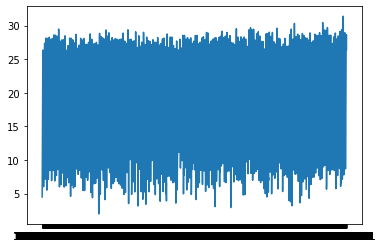

In [121]:
plt.plot(tx.temp)
plt.show()

In [122]:
tx.shape

(2325, 4)

In [123]:
2325/365

6.36986301369863

In [126]:
tx.head(50)

,temp,avg_uncertainty,state,country
date,,,,
1820-01-01,4.489,3.369,Texas,United States
1820-02-01,9.081,2.873,Texas,United States
1820-03-01,12.657,2.423,Texas,United States
1820-04-01,19.215,2.501,Texas,United States
1820-05-01,22.577,2.495,Texas,United States
1820-06-01,25.911,2.469,Texas,United States
1820-07-01,26.356,2.443,Texas,United States
1820-08-01,25.310,2.446,Texas,United States
1820-09-01,23.263,2.626,Texas,United States


In [147]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-01 to 2013-09-01
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             2325 non-null   float64
 1   avg_uncertainty  2325 non-null   float64
 2   state            2325 non-null   object 
 3   country          2325 non-null   object 
 4   month            2325 non-null   object 
dtypes: float64(2), object(3)
memory usage: 109.0+ KB


In [143]:
# tx['month'] = 
tx.index = pd.to_datetime(tx.index)

# .strftime('%B')

In [145]:
tx['month'] = tx.index.strftime('%B')

In [148]:
co.index = pd.to_datetime(co.index)

In [149]:
co['month'] = co.index.strftime('%B')

In [151]:
co.drop(columns='country', inplace=True)
tx.drop(columns='country', inplace=True)

In [153]:
tx.temp = tx.temp * 1.8 + 32

In [155]:
co.temp = co.temp * 1.8 + 32

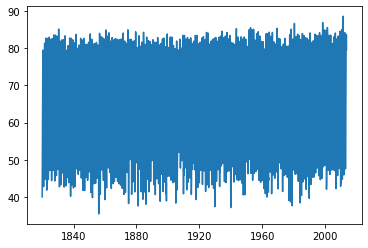

In [154]:
plt.plot(tx.temp)
plt.show()

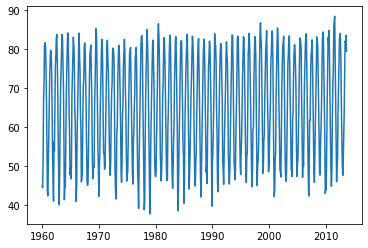

In [162]:
plt.plot(tx['1960':].temp)
plt.show()


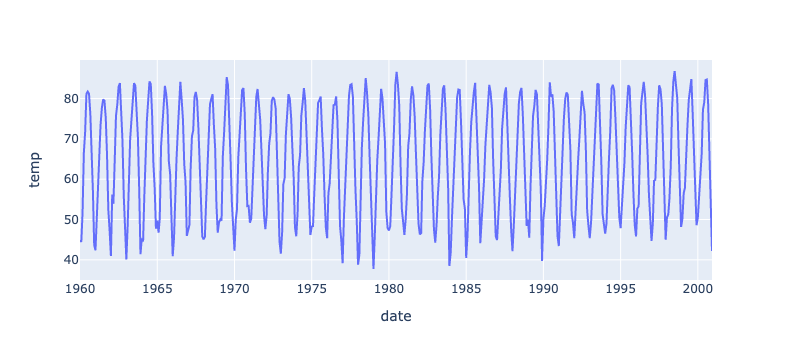

In [167]:
px.line(data_frame=tx['1960':'2000'], y= 'temp')

In [168]:
co['1960':'2000']

,temp,avg_uncertainty,state,month
date,,,,
1960-01-01,20.8076,0.322,Colorado,January
1960-02-01,19.4522,0.264,Colorado,February
1960-03-01,33.2366,0.249,Colorado,March
1960-04-01,45.0806,0.243,Colorado,April
1960-05-01,51.9098,0.361,Colorado,May
...,...,...,...,...
2000-08-01,69.2582,0.304,Colorado,August
2000-09-01,59.4572,0.132,Colorado,September
2000-10-01,47.0966,0.219,Colorado,October


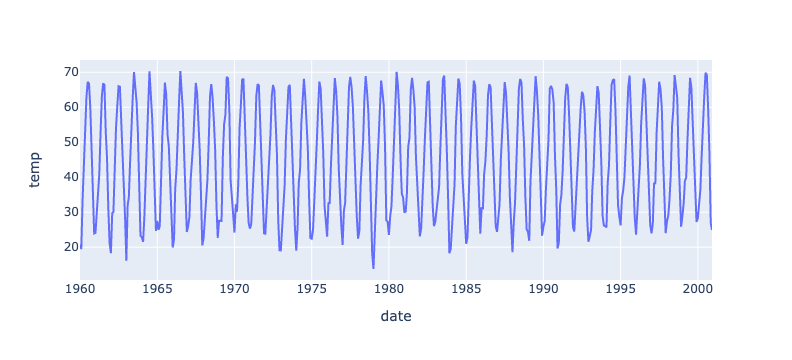

In [169]:
px.line(data_frame=co['1960':'2000'], y= 'temp')

## We'll just look at Teaxas for now
- Additionally, let's just look at 1960 to 2000 as our train, and 2000 forward as our test
- for our first go around, we'll just look at how well we can predict future weather in Texas having 40 years of data and pretending like it's now the year 2001

In [170]:
train = tx.loc['1960':'2000']
test = tx.loc['2001':]

In [172]:
pd.concat([train.tail(1), test.head(1)])

,temp,avg_uncertainty,state,month
date,,,,
2000-12-01,42.1718,0.162,Texas,December
2001-01-01,43.7522,0.116,Texas,January


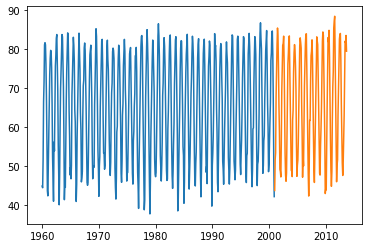

In [173]:
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)
plt.show()


<div class= "alert-box alert alert-info">
    </div>

***
# Explore

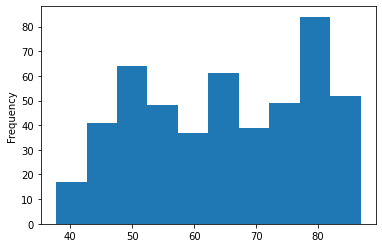

In [174]:
train.temp.plot.hist()
plt.show()

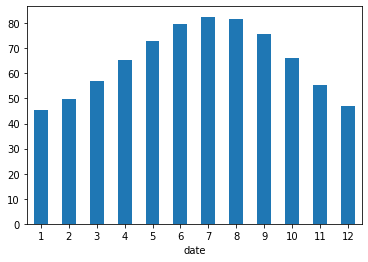

In [183]:
train.groupby(train.index.month).temp.mean().plot.bar(
).tick_params('x', rotation=0)

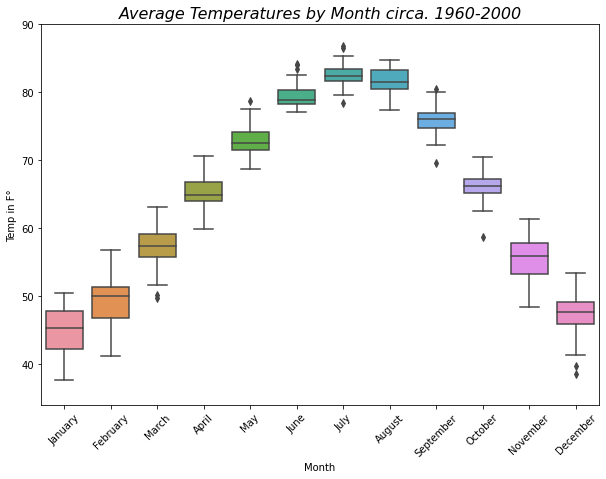

In [213]:
plt.figure(figsize=(10,7))

sns.boxplot(data=train, y='temp', x='month')

fonts = {'fontsize': 16,
         'style': 'oblique'}

plt.title("Average Temperatures by Month circa. 1960-2000", fontdict=fonts)
plt.ylim(34,90)

plt.xlabel('Month')
plt.ylabel('Temp in F°')
plt.tick_params('x', rotation= 45)
plt.show()

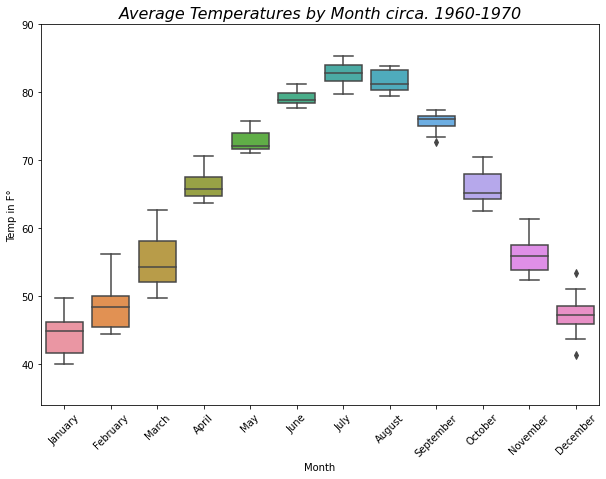

In [212]:
plt.figure(figsize=(10,7))

sns.boxplot(data=train['1960':'1970'], y='temp', x='month')

fonts = {'fontsize': 16,
         'style': 'oblique'}

plt.title("Average Temperatures by Month circa. 1960-1970", fontdict=fonts)
plt.ylim(34,90)

plt.xlabel('Month')
plt.ylabel('Temp in F°')
plt.tick_params('x', rotation= 45)
plt.show()

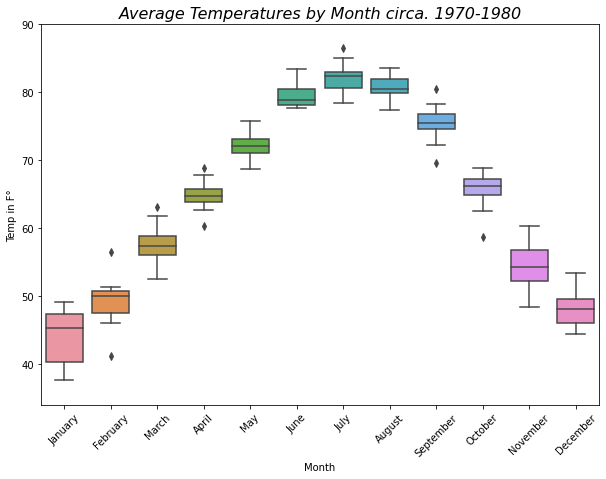

In [211]:
plt.figure(figsize=(10,7))

sns.boxplot(data=train['1970':'1980'], y='temp', x='month')

fonts = {'fontsize': 16,
         'style': 'oblique'}

plt.title("Average Temperatures by Month circa. 1970-1980", fontdict=fonts)
plt.ylim(34,90)

plt.xlabel('Month')
plt.ylabel('Temp in F°')
plt.tick_params('x', rotation= 45)
plt.show()

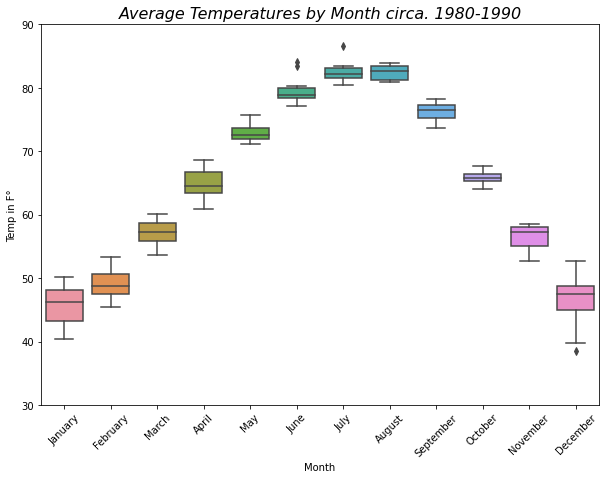

In [208]:
plt.figure(figsize=(10,7))

sns.boxplot(data=train['1980':'1990'], y='temp', x='month')

fonts = {'fontsize': 16,
         'style': 'oblique'}

plt.title("Average Temperatures by Month circa. 1980-1990", fontdict=fonts)
plt.ylim(34,90)

plt.xlabel('Month')
plt.ylabel('Temp in F°')
plt.tick_params('x', rotation= 45)
plt.show()

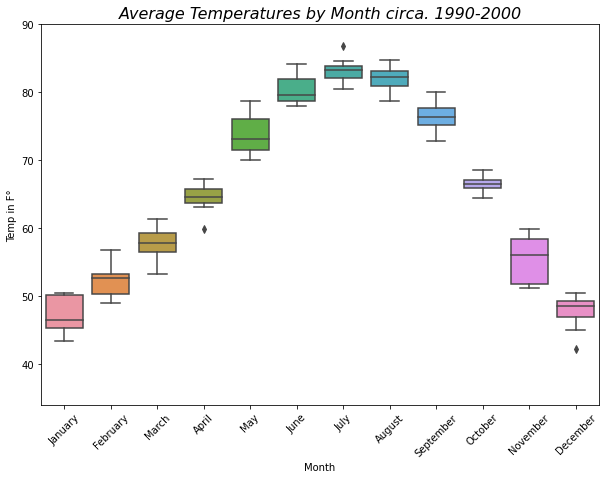

In [210]:
plt.figure(figsize=(10,7))

sns.boxplot(data=train['1990':'2000'], y='temp', x='month')

fonts = {'fontsize': 16,
         'style': 'oblique'}

plt.title("Average Temperatures by Month circa. 1990-2000", fontdict=fonts)
plt.ylim(34,90)

plt.xlabel('Month')
plt.ylabel('Temp in F°')
plt.tick_params('x', rotation= 45)
plt.show()


In [214]:
train.temp.describe()

count    492.000000
mean      64.908120
std       13.422061
min       37.729400
25%       52.617650
50%       65.817500
75%       77.847800
max       86.833400
Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

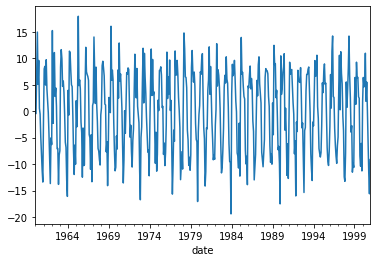

In [216]:
train.temp.diff().plot()

<AxesSubplot:xlabel='date'>

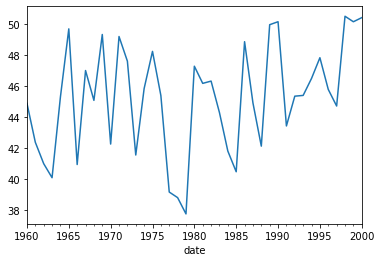

In [218]:
train.temp[train.month == 'January'].plot()

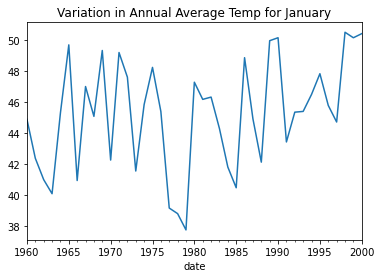

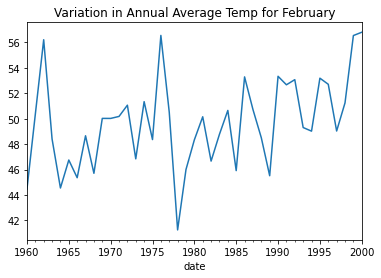

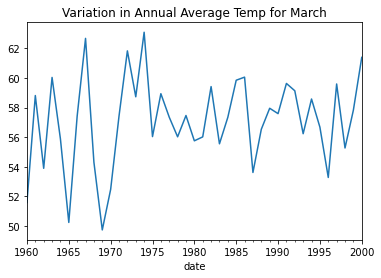

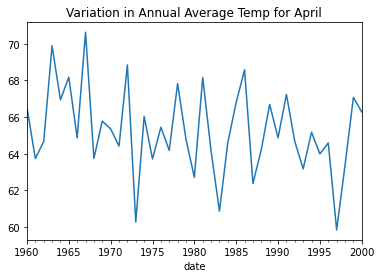

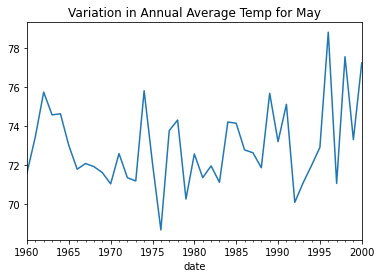

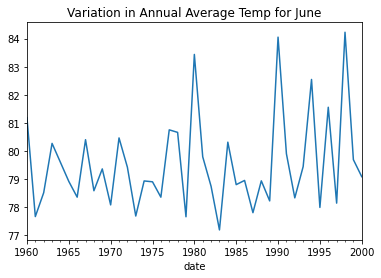

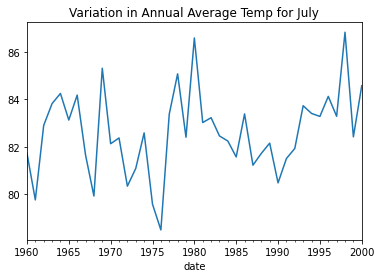

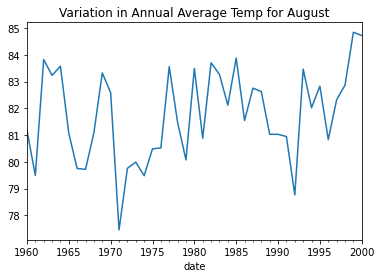

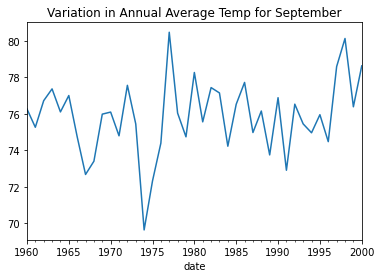

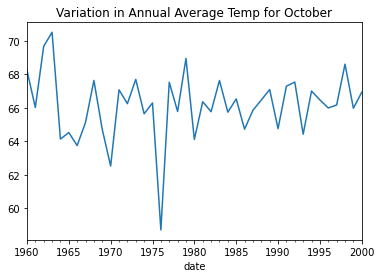

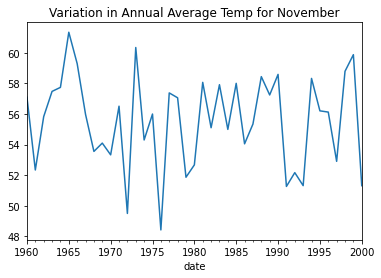

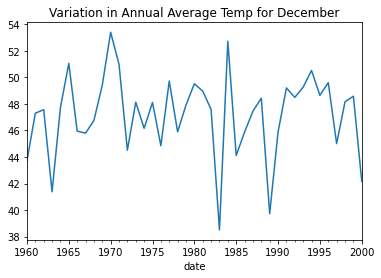

In [222]:
for i in train.month.unique():
    train.temp[train.month == i].plot()
    plt.title(f'Variation in Annual Average Temp for {i}')
    plt.show()

In [223]:
train['year'] = train.index.strftime('%Y')

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1512404581.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
train.year

date
1960-01-01    1960
1960-02-01    1960
1960-03-01    1960
1960-04-01    1960
1960-05-01    1960
              ... 
2000-08-01    2000
2000-09-01    2000
2000-10-01    2000
2000-11-01    2000
2000-12-01    2000
Name: year, Length: 492, dtype: object

<AxesSubplot:xlabel='date'>

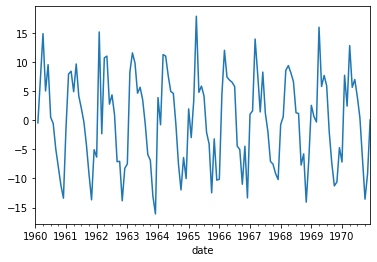

In [225]:
train.temp['1960':'1970'].diff().plot()

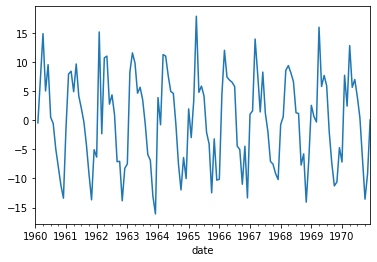

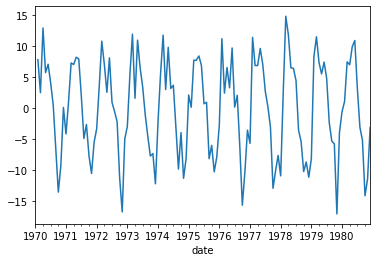

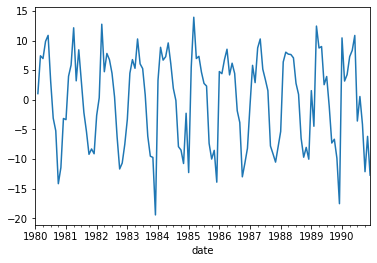

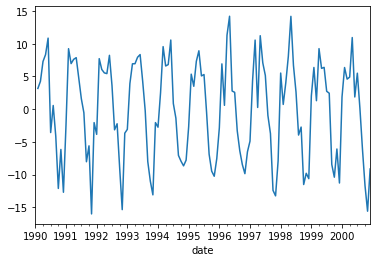

In [227]:
for i in range(1960, 2000, 10):
    train.temp[f'{i}':f'{i+10}'].diff().plot()
    plt.show()

<AxesSubplot:xlabel='date'>

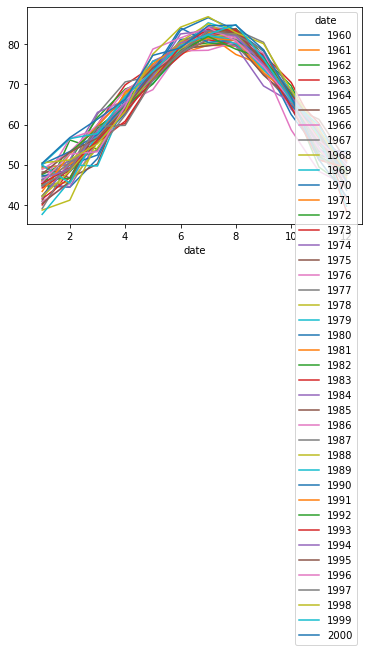

In [228]:
train.temp.groupby([train.index.year, train.index.month]
         ).mean(
).unstack(0).plot()

In [229]:
temp = train.temp

In [230]:
table = temp.groupby([temp.index.year, temp.index.month]).mean().unstack()

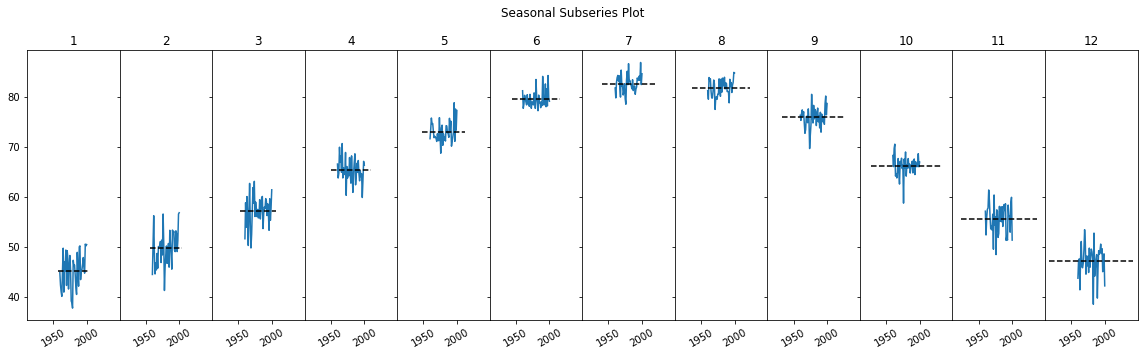

In [231]:
# unpacking my figure and axes elements as I did previously
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

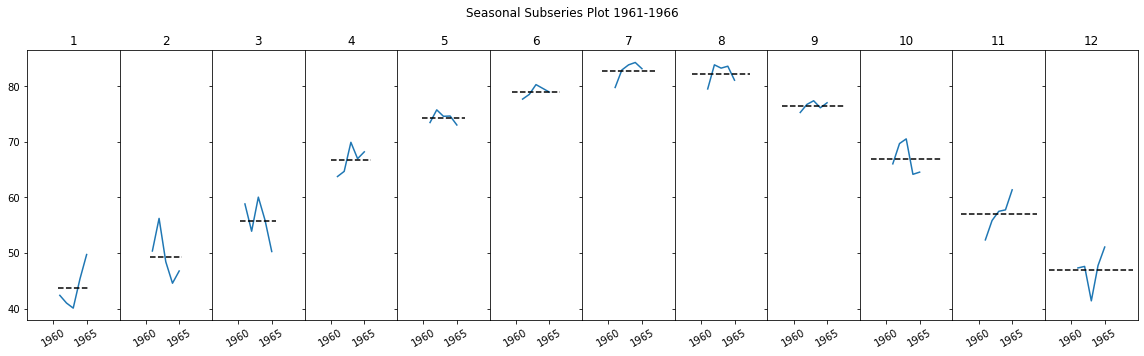

In [243]:
temp = train.temp['1961':'1965']

table = temp.groupby([temp.index.year, temp.index.month]).mean().unstack()

# unpacking my figure and axes elements as I did previously
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot 1961-1966') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

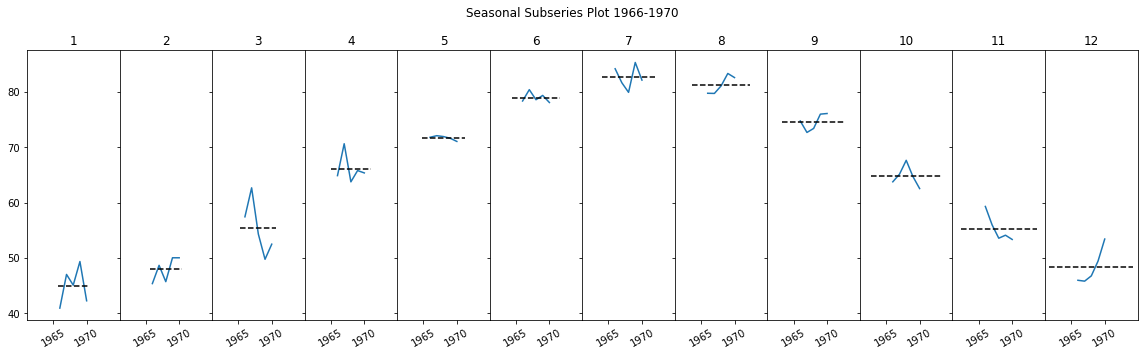

In [242]:
temp = train.temp['1966':'1970']

table = temp.groupby([temp.index.year, temp.index.month]).mean().unstack()

# unpacking my figure and axes elements as I did previously
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot 1966-1970') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

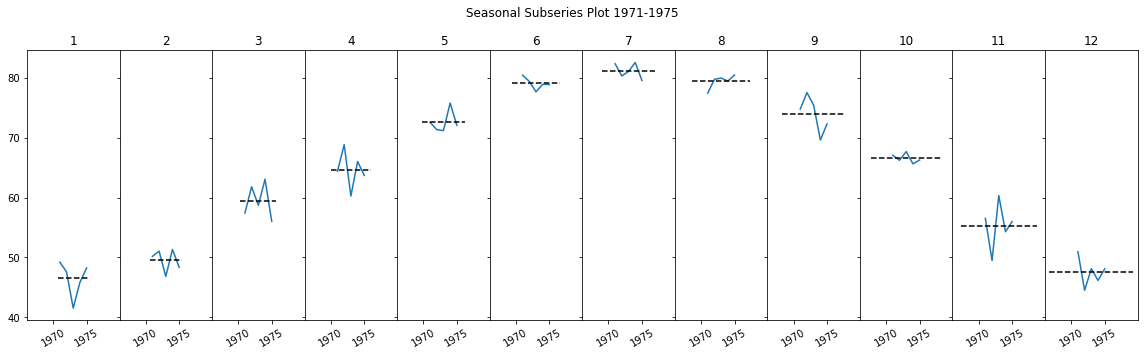

In [241]:
temp = train.temp['1971':'1975']

table = temp.groupby([temp.index.year, temp.index.month]).mean().unstack()

# unpacking my figure and axes elements as I did previously
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot 1971-1975') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [244]:
train['temp(t + 1)'] = train.temp.shift(-1)

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/3697310072.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [245]:
train.head()

,temp,avg_uncertainty,state,month,year,temp(t + 1)
date,,,,,,
1960-01-01,44.8862,0.186,Texas,January,1960,44.4560
1960-02-01,44.4560,0.227,Texas,February,1960,51.5966
1960-03-01,51.5966,0.107,Texas,March,1960,66.5312
1960-04-01,66.5312,0.169,Texas,April,1960,71.5982
1960-05-01,71.5982,0.298,Texas,May,1960,81.1850


[Text(0.5, 0, 'Temp'), Text(0, 0.5, 'Temp + 1')]

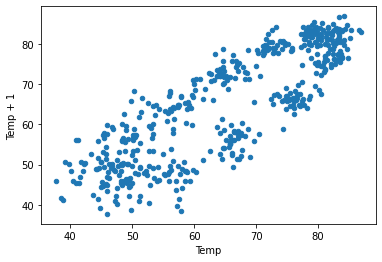

In [246]:
train.plot.scatter(x='temp', y='temp(t + 1)').set(
xlabel='Temp', ylabel='Temp + 1')

In [251]:
monthly = train[['temp']]

In [252]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1960-01-01 to 2000-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    492 non-null    float64
dtypes: float64(1)
memory usage: 23.9 KB


In [253]:
monthly['12_months_out'] = monthly.temp.shift(-12)

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/3246013540.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [255]:
monthly = monthly.rename(columns={'temp':'this_month'})

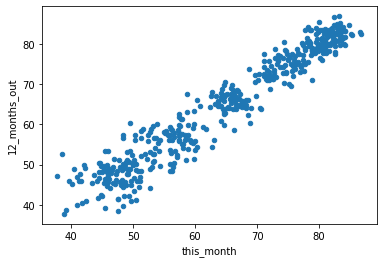

In [256]:
monthly.plot.scatter(x='this_month', y= '12_months_out')
plt.show()

In [257]:
lag = 1
monthly.this_month.iloc[:-lag].shape, monthly.this_month.shift(-lag).dropna().shape

((491,), (491,))

In [258]:
from scipy.stats import pearsonr

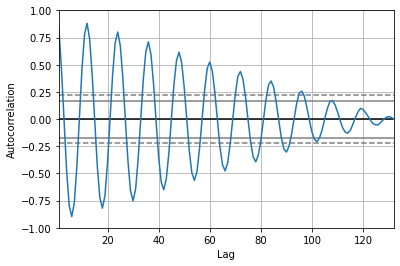

In [270]:
pd.plotting.autocorrelation_plot(monthly['1990':'2000'].this_month)
plt.show()

In [261]:
result = sm.tsa.seasonal_decompose(monthly.this_month)

In [262]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

In [263]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()

<AxesSubplot:xlabel='date'>

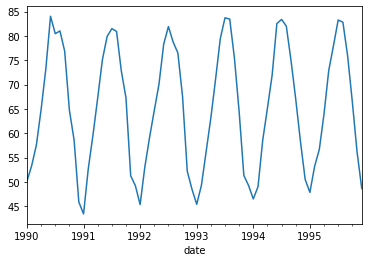

In [266]:
decomposition['1990':'1995'].y.plot()

<AxesSubplot:xlabel='date'>

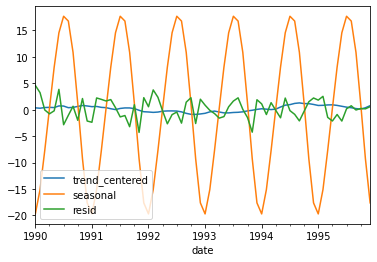

In [268]:
decomposition[['trend_centered', 'seasonal', 'resid']]['1990':'1995'].plot()

<div class= "alert-box alert alert-info">
    </div>

***

## Question 1:

<div class= "alert-box alert alert-info">
    </div>

***

## Visualization

<div class= "alert-box alert alert-info">
    </div>

***

## Stat Test

<div class= "alert-box alert alert-info">
    </div>

***

## Question 2:

<div class= "alert-box alert alert-info">
    </div>

***

## Visualization

<div class= "alert-box alert alert-info">
    </div>

***

## Stat Test

<div class= "alert-box alert alert-info">
    </div>

***

## Question 3:

<div class= "alert-box alert alert-info">
    </div>

***

## Visualization

<div class= "alert-box alert alert-info">
    </div>

***

## Stat Test

<div class= "alert-box alert alert-info">
    </div>

***

# Modeling

**Let's get the train, validate, and test sets**

In [283]:
tx

,temp,avg_uncertainty,state,month
date,,,,
1820-01-01,40.0802,3.369,Texas,January
1820-02-01,48.3458,2.873,Texas,February
1820-03-01,54.7826,2.423,Texas,March
1820-04-01,66.5870,2.501,Texas,April
1820-05-01,72.6386,2.495,Texas,May
...,...,...,...,...
2013-05-01,72.7304,0.158,Texas,May
2013-06-01,82.1138,0.220,Texas,June
2013-07-01,81.7340,0.182,Texas,July


In [290]:
temp_df = tx[['temp']]

In [291]:
train = temp_df['1991':'2000']
validate = temp_df['2001':'2005']
test = temp_df['2006':'2010']

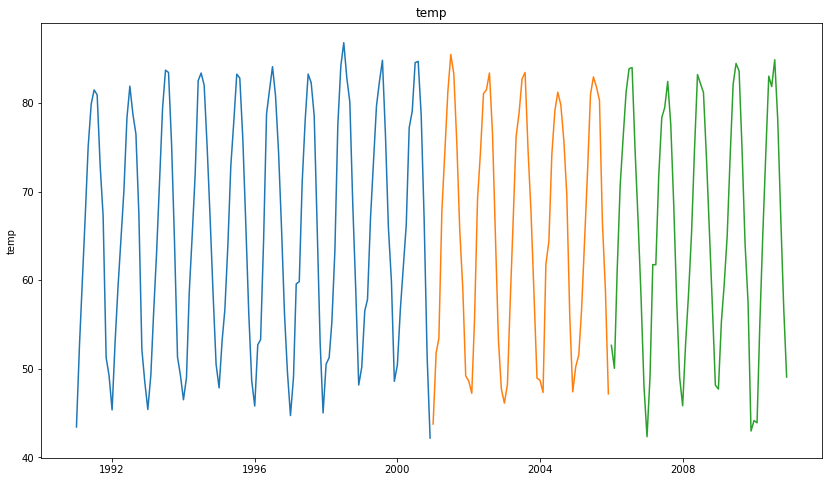

In [292]:
for col in temp_df:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [271]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [272]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [273]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [274]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

<div class= "alert-box alert alert-info">
    </div>

***

## Baseline

### Last observed value
- The simplest method for forecasting is to predict all future values to be the last observed value.

**Make Predictions**

In [287]:
# train['12_months_out'] = train.temp.shift(-12)

In [293]:
train

,temp
date,
1991-01-01,43.4228
1991-02-01,52.6640
1991-03-01,59.6228
1991-04-01,67.2350
1991-05-01,75.1046
...,...
2000-08-01,84.7256
2000-09-01,78.6236
2000-10-01,66.9254


In [294]:
temperature = train.temp[-1:][0]
temperature

42.1718

In [336]:
yhat_df = pd.DataFrame(
{
    'temp': [temperature]},
    index=validate.index
)
yhat_df.head()

,temp
date,
2001-01-01,42.1718
2001-02-01,42.1718
2001-03-01,42.1718
2001-04-01,42.1718
2001-05-01,42.1718


temp -- RMSE: 27


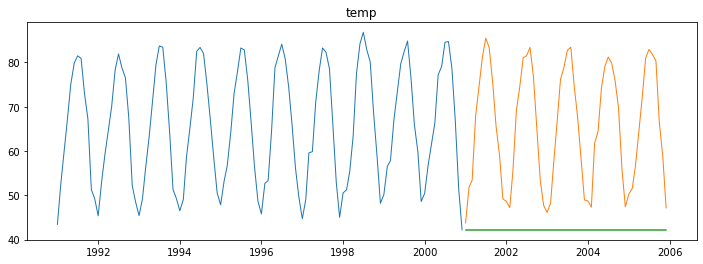

In [299]:
plot_and_eval('temp')

In [300]:
eval_df

,model_type,target_var,rmse


In [301]:
for col in train.columns:
    eval_df = append_eval_df(model_type='last_observed_value',
                            target_var = col)
eval_df


/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1340801264.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model_type,target_var,rmse
0,last_observed_value,temp,27.0


### Simple Average

In [302]:
yhat_df.temp = round(train.temp.mean(), 2)

temp -- RMSE: 13


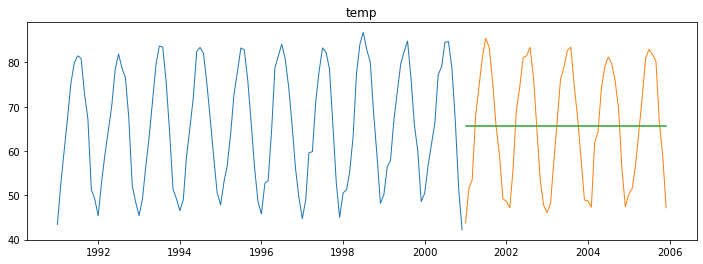

In [303]:
plot_and_eval('temp')

In [304]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'temp')
eval_df

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1340801264.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model_type,target_var,rmse
0,last_observed_value,temp,27.0
1,simple_average,temp,13.0


### Rollllling Average

In [305]:
train['temp'].rolling(12).mean()

date
1991-01-01         NaN
1991-02-01         NaN
1991-03-01         NaN
1991-04-01         NaN
1991-05-01         NaN
                ...   
2000-08-01    67.60985
2000-09-01    67.79675
2000-10-01    67.87595
2000-11-01    67.16270
2000-12-01    66.62840
Name: temp, Length: 120, dtype: float64

In [318]:
yhat_df.temp = round(train.temp.rolling(12).mean()[-1], 2)

In [319]:
yhat_df

,temp
date,
2001-01-01,66.63
2001-02-01,66.63
2001-03-01,66.63
2001-04-01,66.63
2001-05-01,66.63
2001-06-01,66.63
2001-07-01,66.63
2001-08-01,66.63
2001-09-01,66.63


temp -- RMSE: 13


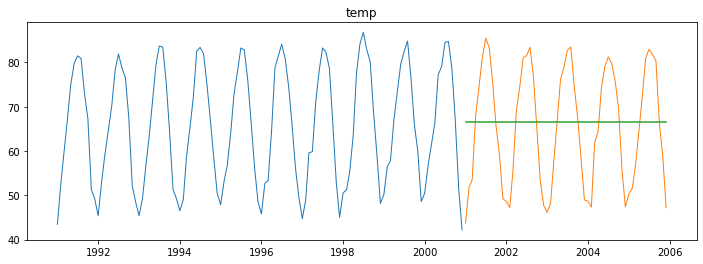

In [320]:
plot_and_eval('temp')

In [321]:
eval_df = append_eval_df(model_type='rolling_average', 
                            target_var = 'temp')
eval_df

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1340801264.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model_type,target_var,rmse
0,last_observed_value,temp,27.0
1,simple_average,temp,13.0
2,rolling_average,temp,13.0


<div class= "alert-box alert alert-info">
    </div>

***

## Models

### Holt 

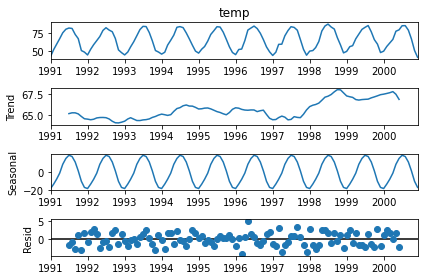

In [323]:
sm.tsa.seasonal_decompose(train[col]).plot()
plt.show()

In [327]:
col = 'temp' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped_trend=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [328]:
model

In [329]:
model = model.fit(optimized=True)

In [331]:
yhat_temp = model.predict(start= validate.index[0], end= validate.index[-1])

In [332]:
yhat_temp

2001-01-01    34.566368
2001-02-01    28.535834
2001-03-01    23.711407
2001-04-01    19.851865
2001-05-01    16.764232
2001-06-01    14.294125
2001-07-01    12.318040
2001-08-01    10.737172
2001-09-01     9.472477
2001-10-01     8.460721
2001-11-01     7.651317
2001-12-01     7.003793
2002-01-01     6.485774
2002-02-01     6.071359
2002-03-01     5.739827
2002-04-01     5.474601
2002-05-01     5.262421
2002-06-01     5.092676
2002-07-01     4.956881
2002-08-01     4.848244
2002-09-01     4.761335
2002-10-01     4.691808
2002-11-01     4.636186
2002-12-01     4.591689
2003-01-01     4.556091
2003-02-01     4.527612
2003-03-01     4.504829
2003-04-01     4.486603
2003-05-01     4.472022
2003-06-01     4.460358
2003-07-01     4.451026
2003-08-01     4.443560
2003-09-01     4.437588
2003-10-01     4.432810
2003-11-01     4.428988
2003-12-01     4.425930
2004-01-01     4.423484
2004-02-01     4.421527
2004-03-01     4.419961
2004-04-01     4.418709
2004-05-01     4.417707
2004-06-01     4

In [337]:
yhat_df.temp = yhat_temp

temp -- RMSE: 61


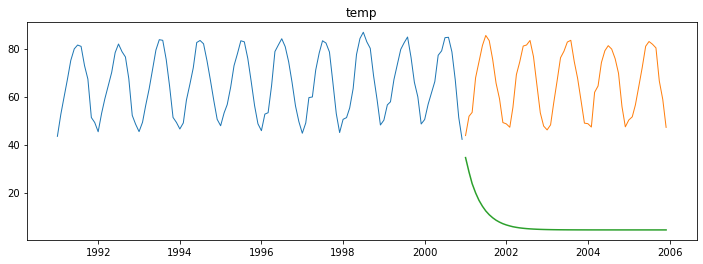

In [338]:
plot_and_eval(target_var= 'temp')

In [339]:
eval_df = append_eval_df(model_type = 'holts_.1', 
                            target_var = 'temp')
eval_df.sort_values(by='rmse')

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1340801264.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model_type,target_var,rmse
1,simple_average,temp,13.0
2,rolling_average,temp,13.0
0,last_observed_value,temp,27.0
3,holts_.1,temp,61.0


####  Maybe try something different here....

### Predict Based on Previous Cycles

- Maybe split the data properly and this will work

In [355]:
train = tx[['temp']].loc['2001':'2010']
validate = tx[['temp']].loc['2011']
test = tx[['temp']].loc['2012']

In [356]:
train.shape, validate.shape, test.shape

((120, 1), (12, 1), (12, 1))

#### Make Predictions

In [ ]:
# yhat_df = train.loc['2010'] + train.diff(12).mean()

In [351]:
train

,temp
date,
2008-01-01,45.8132
2008-02-01,52.9970
2008-03-01,58.4114
2008-04-01,65.3000
2008-05-01,74.6636
2008-06-01,83.2262
2008-07-01,82.2236
2008-08-01,81.2138
2008-09-01,73.7690


In [364]:
# yhat_df = train.loc['2010']

In [379]:
y_diff = train.diff(12).dropna()

for n in range(1, 9):
    # print(n)
    y_diff = y_diff.rolling(12).mean()[12:]
    
yhat_df = train.loc['2010'] + y_diff.dropna()

In [380]:
yhat_df

,temp
date,
2010-01-01,44.247490
2010-02-01,43.916458
2010-03-01,54.871094
2010-04-01,65.077185
2010-05-01,73.908983
2010-06-01,82.751304
2010-07-01,81.508422
2010-08-01,84.481568
2010-09-01,77.628847


In [369]:
# y_diff.rolling(12).mean().dropna()

,temp
date,
2002-12-01,-0.58605
2003-01-01,-1.20000
2003-02-01,-0.73635
2003-03-01,-0.75450
2003-04-01,-1.06455
...,...
2010-08-01,-2.05170
2010-09-01,-1.82625
2010-10-01,-1.44645


In [381]:
yhat_df.index = validate.index

In [382]:
yhat_df

,temp
date,
2011-01-01,44.247490
2011-02-01,43.916458
2011-03-01,54.871094
2011-04-01,65.077185
2011-05-01,73.908983
2011-06-01,82.751304
2011-07-01,81.508422
2011-08-01,84.481568
2011-09-01,77.628847


temp -- RMSE: 4


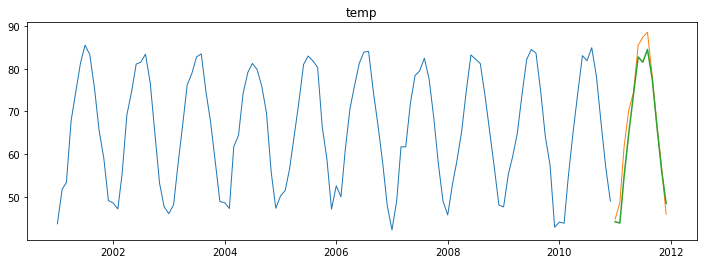

In [383]:
plot_and_eval(target_var= 'temp')

In [391]:
eval_df = append_eval_df(model_type = 'Previous Cycles', 
                            target_var = 'temp')
eval_df.sort_values(by='rmse')

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_34241/1340801264.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model_type,target_var,rmse
4,Previous Cycles,temp,4.0
1,simple_average,temp,13.0
2,rolling_average,temp,13.0
0,last_observed_value,temp,27.0
3,holts_.1,temp,61.0


In [354]:
# train.diff(12).dropna().diff(12).dropna()

,temp
date,
2010-01-01,-5.4540
2010-02-01,-13.8384
2010-03-01,-5.5080
2010-04-01,0.5274
2010-05-01,1.1016
2010-06-01,1.9710
2010-07-01,-4.8726
2010-08-01,-1.1520
2010-09-01,2.7054


<div class= "alert-box alert alert-info">
    </div>

***

## Model Performance

In [392]:
min_rmse = eval_df.groupby('target_var')['rmse'].min()

In [393]:
min_rmse

target_var
temp    4.0
Name: rmse, dtype: float64

In [394]:
eval_df[eval_df.rmse == min_rmse[0]]

,model_type,target_var,rmse
4,Previous Cycles,temp,4.0


- **We will now use the train and validate information to predict test!**

In [402]:
validate

,temp
date,
2011-01-01,44.8178
2011-02-01,48.6410
2011-03-01,61.8170
2011-04-01,70.4318
2011-05-01,74.3522
2011-06-01,85.4870
2011-07-01,87.3158
2011-08-01,88.5218
2011-09-01,78.2528


In [397]:
y_diff

,temp
date,
2010-01-01,0.101090
2010-02-01,0.020258
2010-03-01,-0.062706
2010-04-01,-0.145415
2010-05-01,-0.225417
2010-06-01,-0.300296
2010-07-01,-0.367778
2010-08-01,-0.425832
2010-09-01,-0.472753


In [398]:
test

,temp
date,
2012-01-01,50.2286
2012-02-01,51.6398
2012-03-01,63.0698
2012-04-01,70.1420
2012-05-01,75.7184
2012-06-01,82.6484
2012-07-01,83.8562
2012-08-01,84.0956
2012-09-01,77.0468


In [403]:
y_diff.index = test.index

In [404]:
yhat_df = validate.set_index(test.index) + y_diff
# yhat_df.index = test.index
yhat_df

,temp
date,
2012-01-01,44.918890
2012-02-01,48.661258
2012-03-01,61.754294
2012-04-01,70.286385
2012-05-01,74.126783
2012-06-01,85.186704
2012-07-01,86.948022
2012-08-01,88.095968
2012-09-01,77.780047


In [405]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

In [406]:
rmse = sqrt(mean_squared_error(test['temp'], yhat_df['temp']))
rmse

3.016171658012307

<div class= "alert-box alert alert-info">
    </div>

***

## Model Visualization

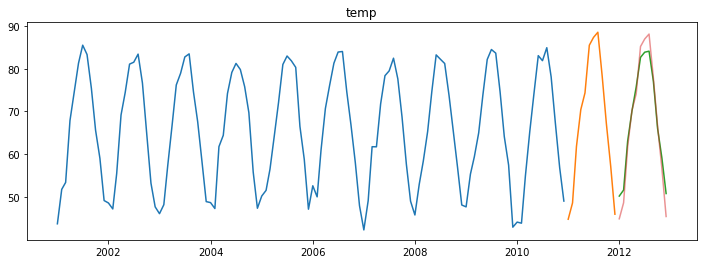

In [407]:
final_plot('temp')

<div class= "alert-box alert alert-info">
    </div>

***

# Conclusion

- **The Previous cycle method worked stunningly better than any of the baseline methods, which performed better than the Holt Model**

<div class= "alert-box alert alert-info">
    </div>

***
## Key Take Aways